### Aprendizado de Máquina Estatístico
Exercício 2 - Lista 3

In [272]:
## Bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Simulação de uma base de dados

In [273]:
## semente
np.random.seed(12)

## Gerar valores de um espaço linear.
n = 1000
X1 = np.random.normal(loc=10,scale=2,size=n) ## Normal
X2 = np.random.gamma(shape=2,scale=3,size=n) ## Gamma
X3 = np.random.poisson(lam=5,size=n) ## Poisson
X4 = np.random.binomial(n=1,p=0.68) ## Bernoulli, 0 e 1
X5 = np.random.binomial(n=1,p=0.35) ## Bernoulli, 0 e 1


O controle das classes é feita pelo ajuste do intercepto e da contribuição de cada preditora da combinação linear. Os coeficientes que apresentarem a maior soma positiva entre os pesos e intercepto apresentarão maior frequência na quantificação de classes da variável resposta. O controle desta soma também deve ser por tentativa e erro para a quantidade na classe 1 (categoria de referência) seja consequência das demais.

In [320]:
lp2 = -0.3 - 0.1*X1 + 0.1*X2 + 0.1*X3 + 0.1*X4 + 0.3*X5
lp3 = 0.75 - 0.2*X1 + 0.1*X2 + 0.14*X3 + 0.2*X4 + 0.1*X5
lp4 = -1.2 + 0.2*X1 + 0.1*X2 - 0.24*X3 + 0.2*X4 + 0.2*X5

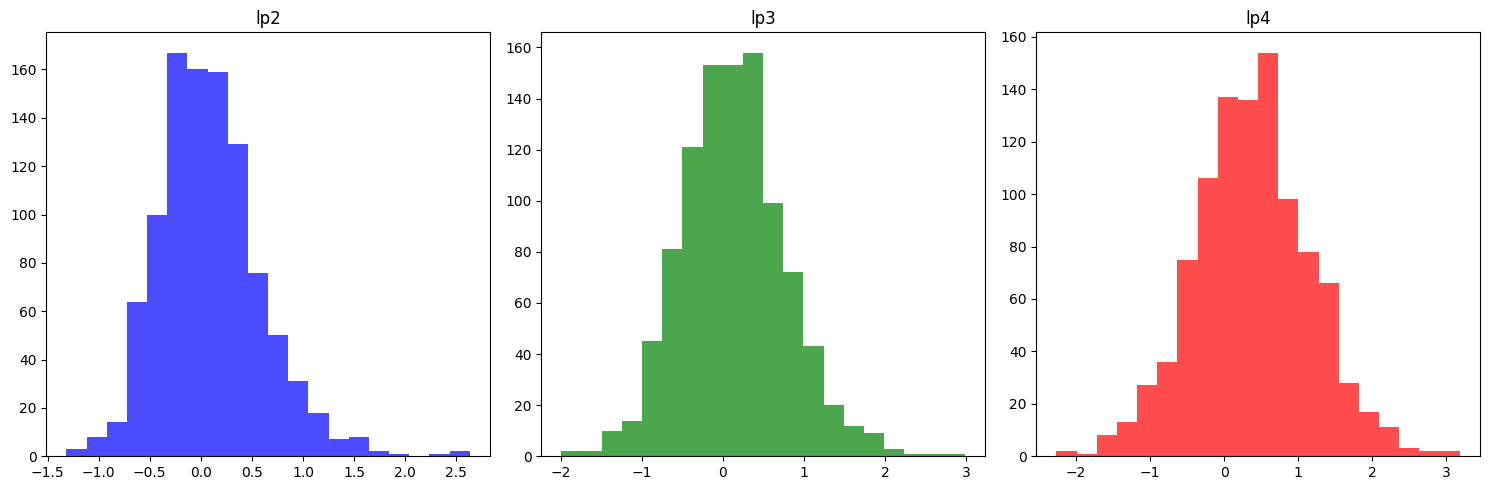

In [321]:
# Criar uma figura com quatro subplots em uma grade 2x2
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotar o primeiro histograma
axes[0].hist(lp2, bins=20, color='blue', alpha=0.7)
axes[0].set_title('lp2')

# Plotar o segundo histograma
axes[1].hist(lp3, bins=20, color='green', alpha=0.7)
axes[1].set_title('lp3')

# Plotar o terceiro histograma
axes[2].hist(lp4, bins=20, color='red', alpha=0.7)
axes[2].set_title('lp4')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()

# Exibir a figura
plt.show()

In [323]:
# O denominador, garante que as probabilidade somam 1
den = (1 + np.exp(lp2) + np.exp(lp3) + np.exp(lp4))
p1 = 1/den
p2 = np.exp(lp2)/den
p3 = np.exp(lp3)/den
p4 = np.exp(lp4)/den
P = pd.concat([pd.Series(p1),pd.Series(p2),pd.Series(p3),pd.Series(p4)],axis=1)
P.columns = ["p1","p2","p3","p4"]

P

,p1,p2,p3,p4
0,0.072948,0.135930,0.115300,0.675822
1,0.146384,0.249773,0.289119,0.314724
2,0.277877,0.144247,0.133358,0.444518
3,0.170199,0.249640,0.340415,0.239746
4,0.173717,0.170413,0.148057,0.507813
...,...,...,...,...
995,0.152219,0.262427,0.265156,0.320198
996,0.095951,0.118873,0.095788,0.689389
997,0.098239,0.085432,0.064464,0.751864
998,0.159658,0.097909,0.074747,0.667687


In [324]:
## simular as classes dos indivíduos baseando-se na probabilidade gerada no modelo multinomial
tipo_classes = [1,2,3,4]

classe = n*[np.nan]
for individuo in range(n):
    classe[individuo] = np.random.choice(tipo_classes,p=P.iloc[individuo,:])

In [325]:
classe = pd.Series(classe)
classe.value_counts(normalize=True)

4    0.356
3    0.267
2    0.198
1    0.179
Name: proportion, dtype: float64

Apresentando um caso particular, caso binário (2 classes).

In [217]:
## semente
np.random.seed(12)

## Gerar valores de um espaço linear.
n = 1000
X1 = np.random.normal(loc=10,scale=2,size=n) ## Normal
X2 = np.random.gamma(shape=2,scale=3,size=n) ## Gamma
X3 = np.random.poisson(lam=5,size=n) ## Poisson
X4 = np.random.binomial(n=1,p=0.68) ## Bernoulli, 0 e 1
X5 = np.random.binomial(n=1,p=0.35) ## Bernoulli, 0 e 1

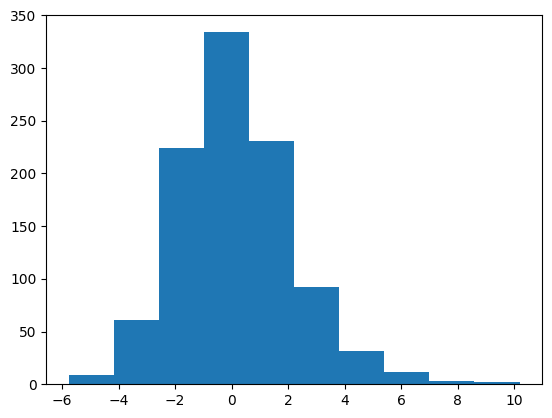

In [268]:
lp2 = 1.1 - 0.5*X1 + 0.4*X2 + 0.3*X3 - 0.6*X4 + 0.2*X5
## para classes balanceadas, temos que configurar lp2 (preditor linear) 
## de tal forma que estejam concentrados em torno de zero.
plt.hist(lp2)

plt.show()

In [269]:
# O denominador, garante que as probabilidade somam 1
den = (1 + np.exp(lp2))
p1 = 1/den
p2 = np.exp(lp2)/den

P = pd.concat([pd.Series(p1),pd.Series(p2)],axis=1)
P.columns = ["p1","p2"]

In [270]:
## simular as classes dos indivíduos baseando-se na probabilidade gerada no modelo Bernoulli
tipo_classes = [0,1]

classe = n*[np.nan]
for individuo in range(n):
    classe[individuo] = np.random.choice(tipo_classes,p=P.iloc[individuo,:])

In [271]:
classe = pd.Series(classe)
classe.value_counts(normalize=True)

0    0.504
1    0.496
Name: proportion, dtype: float64